In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate, KFold, LeaveOneOut, GridSearchCV,learning_curve,validation_curve
from tqdm import tqdm
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [4]:
data = pd.read_csv('pulsar_stars.csv', sep=",")

In [5]:
display(data)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [11]:
data.isnull().sum()
total_count = data.shape[0]
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))
data.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [12]:
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data[[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']], data['target_class'], test_size=0.2, random_state=0)
print('Число строк обучающего и тестового наборов:')
print('  Обучающий: {0} ({1} %)'.format(data_X_train.shape[0], round(data_X_train.shape[0]/data.shape[0]*100,4)))
print('  Тестовый: {0} ({1} %)'.format(data_X_test.shape[0], round(data_X_test.shape[0]/data.shape[0]*100,4)))

Число строк обучающего и тестового наборов:
  Обучающий: 14318 (79.9978 %)
  Тестовый: 3580 (20.0022 %)


In [17]:
# Проведём обучение 3 моделей с различным числом соседей
Classifier3N = KNeighborsClassifier(n_neighbors = 3)
Classifier3N.fit(data_X_train,data_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
# Оценка качества обучения модели.
Nb3Score = round(Classifier3N.score(data_X_train,data_y_train)*100, 4)
print('Классификатор с 3 соседями: {} %'.format(Nb3Score))

Классификатор с 3 соседями: 97.9117 %


In [19]:
Results3N = Classifier3N.predict(data_X_test)
accuracy_score(data_y_test, Results3N)

0.9754189944134078

In [20]:
# Рассмотрим результаты для каждого класса отдельно
resultDF = {
        'Prediction': Results3N,
        'Answer': data_y_test
}
ResultData = pd.DataFrame(resultDF, columns = ['Prediction','Answer'])
Classes = np.unique(data_y_test)
for c in Classes:
    temp_data_flt = ResultData[ResultData['Answer']==c]
    temp_acc = accuracy_score(
        temp_data_flt['Answer'].values, 
        temp_data_flt['Prediction'].values)
    print('Результат для класса {0}: {1} %'.format(c, round(temp_acc*100, 4)))

Результат для класса 0: 99.0018 %
Результат для класса 1: 79.927 %


In [21]:
ClassReport3N = classification_report(data_y_test, Results3N, output_dict = True)
for ReportName,ReportResult in ClassReport3N.items():
    print('\nClass :',ReportName)
    for result0, result1 in ReportResult.items():
        print('   {0} : \t{1}'.format(result0, result1))


Class : 0
   precision : 	0.9834735576923077
   recall : 	0.9900181488203267
   f1-score : 	0.9867350015073862
   support : 	3306

Class : 1
   precision : 	0.8690476190476191
   recall : 	0.7992700729927007
   f1-score : 	0.8326996197718631
   support : 	274

Class : micro avg
   precision : 	0.9754189944134078
   recall : 	0.9754189944134078
   f1-score : 	0.9754189944134078
   support : 	3580

Class : macro avg
   precision : 	0.9262605883699634
   recall : 	0.8946441109065137
   f1-score : 	0.9097173106396247
   support : 	3580

Class : weighted avg
   precision : 	0.9747158182541389
   recall : 	0.9754189944134078
   f1-score : 	0.9749457013410362
   support : 	3580


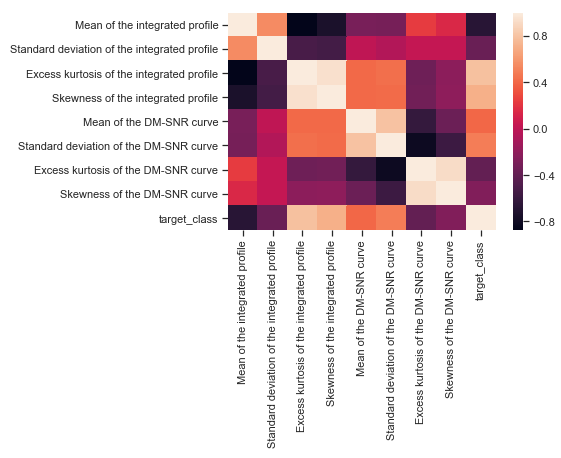

In [22]:
sns.heatmap(data.corr())

In [24]:
# Кросс-валидация
# Стратифицированная K-Fold перекрёстная проверка
Scores1 = cross_val_score(Classifier3N, data[[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']], data['target_class'], cv = 3)
print('Результаты нестратифицированной перекрёстной проверки:')
for Sc in Scores1:
    print('    {} %'.format(round(Sc*100,4)))
print('Средний результат нестратифицированной перекрёстной проверки: {} %\n'.format(round(Scores1.mean()*100,4)))
# Результат не точен из-за распределения классов в датасете
# Для решения данной проблеммы применим стратифицированную перекрёстную проверку
kfold = KFold(n_splits = 3, shuffle = True, random_state=0)
KFoldStartTime = time.time()
Scores2 = cross_val_score(Classifier3N, data[[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']], data['target_class'], cv = kfold)
KFoldStopTime = time.time()
print('Результаты стратифицированной перекрёстной проверки:')
for Sc in Scores2:
    print('    {} %'.format(round(Sc*100,4)))
print('Средний результат стратифицированной перекрёстной проверки: {} %'.format(round(Scores2.mean()*100,4)))

Результаты нестратифицированной перекрёстной проверки:
    96.8661 %
    97.0835 %
    97.0327 %
Средний результат нестратифицированной перекрёстной проверки: 96.9941 %

Результаты стратифицированной перекрёстной проверки:
    97.3684 %
    97.4187 %
    96.832 %
Средний результат стратифицированной перекрёстной проверки: 97.2064 %


In [25]:
# Перекрёстная проверка с исключением по одному
loo = LeaveOneOut()
LOOStartTime = time.time()
Scores3 = cross_val_score(Classifier3N, data[[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']], data['target_class'], cv = loo)
LOOStopTime = time.time()
print('Средний результат перекрёстной проверки  с исключением по одному: {} %'.format(round(Scores3.mean()*100,4)))
print('Время выполнения стратифицированной перекрёстной проверки:{} с'.format(round(KFoldStopTime-KFoldStartTime,4)))
print('Время выполнения перекрёстной проверки с исключением по одному:{} с'.format(round(LOOStopTime-LOOStartTime,4)))

Средний результат перекрёстной проверки  с исключением по одному: 97.1673 %
Время выполнения стратифицированной перекрёстной проверки:0.5769 с
Время выполнения перекрёстной проверки с исключением по одному:216.5416 с


In [ ]:
# Оптимизаия гиперпараметров
NeighborsArr = np.array(range(1,4))
tuned_parameters = [{'n_neighbors':NeighborsArr}]
ClassifierGS = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=loo, scoring='accuracy')
ClassifierGS.fit(data[[' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve']], data['target_class'])

In [ ]:
GSBP = ClassifierGS.best_params_.get('n_neighbors')
GSBP

In [29]:
ClassifierGSBP = KNeighborsClassifier(n_neighbors = GSBP)
ClassifierGSBP.fit(data_X_train,data_y_train)
ResultsGSBP = ClassifierGSBP.predict(data_X_test)
ClassReport5N = classification_report(data_y_test, ResultsGSBP, output_dict = True)
for ReportName,ReportResult in ClassReport5N.items():
    print('\nClass :',ReportName)
    for result0, result1 in ReportResult.items():
        print('   {0} : \t{1}'.format(result0, result1))

NameError: name 'GSBP' is not defined

In [30]:
# Кривые обучения и валидации
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

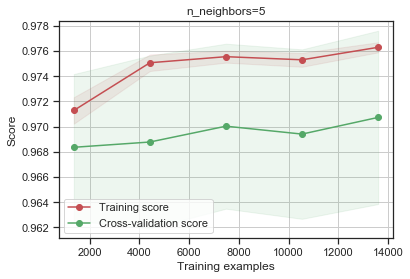

In [31]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors={}'.format(5), 
                    data_X_train, data_y_train, cv=20)

In [32]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

In [33]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      data_X_train, data_y_train, 
                      param_name='n_neighbors', param_range=NeighborsArr, 
                      cv=20, scoring="accuracy")

KeyboardInterrupt: 